In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
dfs = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
dfs.shape

(12043, 23)

In [4]:
dfs.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
dfs['status'].unique()

array(['authorized', 'posted'], dtype=object)

In [7]:
dfs.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [8]:
# bpay_biller_code
# merchant_id
# merchant_code
# merchant_suburb
# merchant_state

In [9]:
dfs['card_present_flag'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
12038    0.0
12039    1.0
12040    1.0
12041    1.0
12042    1.0
Name: card_present_flag, Length: 12043, dtype: float64>

/Users/akshayadlakha/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/akshayadlakha/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


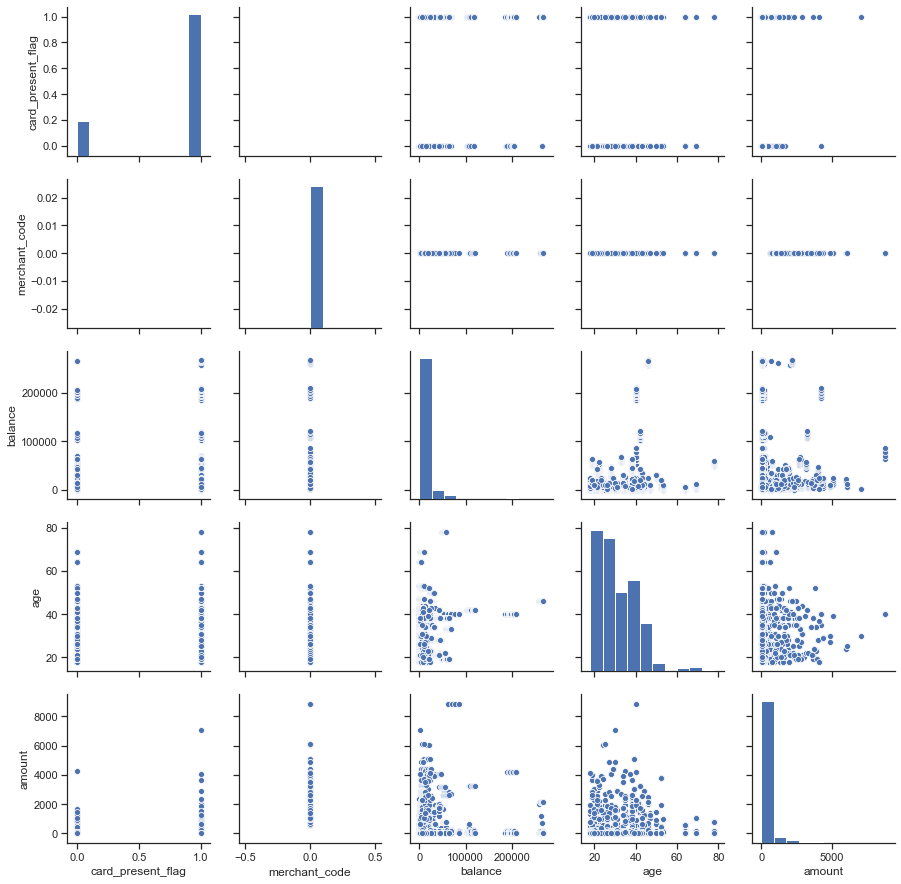

In [10]:
sb.set(style="ticks", color_codes=True)
g = sb.pairplot(dfs)

In [11]:
dfs['date'].unique()

array(['2018-08-01T00:00:00.000000000', '2018-08-02T00:00:00.000000000',
       '2018-08-03T00:00:00.000000000', '2018-08-04T00:00:00.000000000',
       '2018-08-05T00:00:00.000000000', '2018-08-06T00:00:00.000000000',
       '2018-08-07T00:00:00.000000000', '2018-08-08T00:00:00.000000000',
       '2018-08-09T00:00:00.000000000', '2018-08-10T00:00:00.000000000',
       '2018-08-11T00:00:00.000000000', '2018-08-12T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2018-08-14T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-08-18T00:00:00.000000000', '2018-08-19T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000', '2018-08-21T00:00:00.000000000',
       '2018-08-22T00:00:00.000000000', '2018-08-23T00:00:00.000000000',
       '2018-08-24T00:00:00.000000000', '2018-08-25T00:00:00.000000000',
       '2018-08-26T00:00:00.000000000', '2018-08-27T00:00:00.000000000',
       '2018-08-28T00:00:00.000000000', '2018-08-29

In [12]:
# average transaction amount

dfs['amount'].sum()/dfs['amount'].count()

187.93358797641784

In [13]:
custvalues = dfs.groupby('customer_id')['amount'].count()
custvalues

customer_id
CUS-1005756958     73
CUS-1117979751    100
CUS-1140341822     80
CUS-1147642491    118
CUS-1196156254    245
                 ... 
CUS-72755508       58
CUS-809013380     124
CUS-860700529     233
CUS-880898248      78
CUS-883482547     178
Name: amount, Length: 100, dtype: int64

In [14]:
# August month transaction
start_date = '2018-08-01'
end_date = '2018-08-31'

mask = (dfs['date'] >= start_date) & (dfs['date'] <= end_date)
august = dfs.loc[mask]
august

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,authorized,1.0,NaN,ACC-588564840,AUD,151.27 -33.76,SALES-POS,edadc46b-f158-4c81-a040-7f615aaf9c4d,NaN,Isaiah,...,23,Castle Hill,NSW,2018-08-31T23:01:41.000+0000,21.86,4291ddcf81c54f5b9a420289f679f0a1,Australia,CUS-1462656821,151.01 -33.73,debit
3939,authorized,1.0,NaN,ACC-2265520058,AUD,151.27 -33.85,SALES-POS,6fcf2543-343c-497c-ab74-63660c75cac5,NaN,Catherine,...,26,Bondi Beach,NSW,2018-08-31T23:15:46.000+0000,43.57,cb130761591b4095b1fb922aba36ec48,Australia,CUS-331942311,151.27 -33.89,debit
3940,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,SALES-POS,9f3694c1-cdf2-4a95-9908-1e590194a552,NaN,Jeffrey,...,30,Chermside,QLD,2018-08-31T23:29:51.000+0000,14.46,42f4afcfcf0d475aacb31c845ce67ad4,Australia,CUS-860700529,153.03 -27.39,debit
3941,authorized,1.0,NaN,ACC-2231965366,AUD,144.96 -37.84,POS,ad1404e0-42fe-4df6-ab2b-ed1b8fd73c1a,NaN,Linda,...,35,Docklands,VIC,2018-08-31T23:43:56.000+0000,11.06,8fd0b5addc654dce9db7fd1b093e9604,Australia,CUS-2155701614,144.95 -37.82,debit


In [15]:
august['amount'].mean()

185.12186659903654

In [16]:
august['amount'].max()

8835.98

In [17]:
august['amount'].min()

1.52

In [18]:
custvaluesaug = august.groupby('customer_id')['amount'].count()
custvaluesaug

customer_id
CUS-1005756958    50
CUS-1117979751    43
CUS-1140341822    15
CUS-1147642491    29
CUS-1196156254    82
                  ..
CUS-72755508      19
CUS-809013380     68
CUS-860700529     53
CUS-880898248     32
CUS-883482547     61
Name: amount, Length: 100, dtype: int64

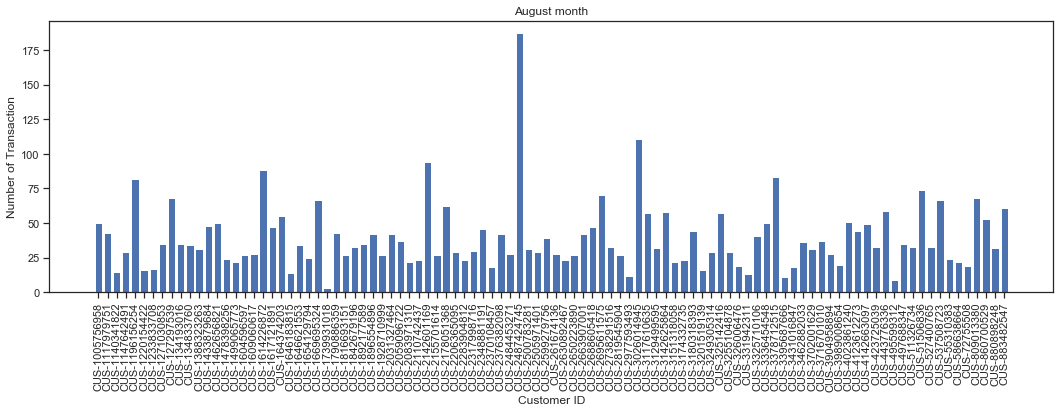

In [19]:
custvaluesaug = august.groupby('customer_id')['amount'].count()
f, ax = plt.subplots(figsize=(18,5))

plt.bar(custvaluesaug.index.to_numpy(),custvaluesaug.to_numpy())
plt.xticks(rotation=90)
plt.title('August month')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transaction')
plt.show()

In [20]:
# September month transaction
start_date_sep = '2018-09-01'
end_date_sep = '2018-09-30'

mask_sep = (dfs['date'] >= start_date_sep) & (dfs['date'] <= end_date_sep)
september = dfs.loc[mask_sep]
september

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
3943,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,POS,35703b7a-216b-4a01-9056-0bfd36d2ec03,NaN,Jeffrey,...,30,Redbank,QLD,2018-09-01T00:35:49.000+0000,9.15,900330f3b6e64a4aa547e90ff93b8326,Australia,CUS-860700529,152.87 -27.61,debit
3944,authorized,1.0,NaN,ACC-2897221629,AUD,150.90 -34.37,POS,86bbe984-a9a6-48a8-a449-c59edbdf7032,NaN,Scott,...,23,Parramatta,NSW,2018-09-01T01:08:04.000+0000,85.84,d451a84695e6409b8e92dd45f0f28832,Australia,CUS-511326734,151.02 -33.81,debit
3945,authorized,1.0,NaN,ACC-2681137560,AUD,151.11 -33.99,POS,ffb4538f-cf69-434f-8c0a-5c9e7a8d359b,NaN,Nathaniel,...,31,Ryde,NSW,2018-09-01T01:27:18.000+0000,15.66,59377e7f435944729ed6fed10868337f,Australia,CUS-2083971310,151.11 -33.81,debit
3946,authorized,1.0,NaN,ACC-3541460373,AUD,145.00 -37.83,SALES-POS,727f70ec-7434-44fd-8cd7-0583a1b07097,NaN,Jeffrey,...,24,Bairnsdale,VIC,2018-09-01T01:46:32.000+0000,14.87,7301eeeda28a4ca3a578b2e09a786ed8,Australia,CUS-1433879684,147.63 -37.83,debit
3947,posted,NaN,NaN,ACC-3481401842,AUD,115.74 -31.72,PAYMENT,NaN,NaN,Tiffany,...,25,NaN,NaN,2018-09-01T02:00:00.000+0000,26.00,37ed6589ae98454988284d6c7e15d5c1,Australia,CUS-1669695324,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,authorized,1.0,NaN,ACC-3541460373,AUD,145.00 -37.83,SALES-POS,80e385f5-f9c6-459e-9b35-84fa988fd982,NaN,Jeffrey,...,24,Lilydale,VIC,2018-09-30T22:50:09.000+0000,17.36,bc7ed6034bb749779138d2a1eadb4fb8,Australia,CUS-1433879684,145.36 -37.76,debit
7952,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,POS,3505551c-2dfe-41a4-9c7b-d36bd70ea869,NaN,Rhonda,...,40,Oakleigh,VIC,2018-09-30T22:57:58.000+0000,21.62,c652d138d1d541d996b5c1c90bb41eb1,Australia,CUS-1614226872,145.09 -37.9,debit
7953,authorized,1.0,NaN,ACC-2890243754,AUD,153.32 -27.93,SALES-POS,cf2ac034-f61a-4c17-9312-09d5c68fecb3,NaN,Joseph,...,37,Southport,QLD,2018-09-30T23:12:19.000+0000,8.33,6e61abc2c40c4726832dfbc6a71f806b,Australia,CUS-2695611575,153.42 -27.97,debit
7954,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,2bcf4f78-081b-4758-8c38-23c162ee36cd,NaN,Rhonda,...,40,Alexandra Hills,QLD,2018-09-30T23:28:59.000+0000,20.12,0c6e305d06c142f5b0d808ad5718c779,Australia,CUS-1614226872,153.22 -27.52,debit


In [21]:
september['amount'].mean()

182.04590331422853

In [22]:
september['amount'].max()

8835.98

In [23]:
september['amount'].min()

0.1

In [24]:
custvaluessep = september.groupby('customer_id')['amount'].count()
custvaluessep

customer_id
CUS-1005756958    14
CUS-1117979751    25
CUS-1140341822    22
CUS-1147642491    39
CUS-1196156254    98
                  ..
CUS-72755508      13
CUS-809013380     42
CUS-860700529     89
CUS-880898248     17
CUS-883482547     58
Name: amount, Length: 100, dtype: int64

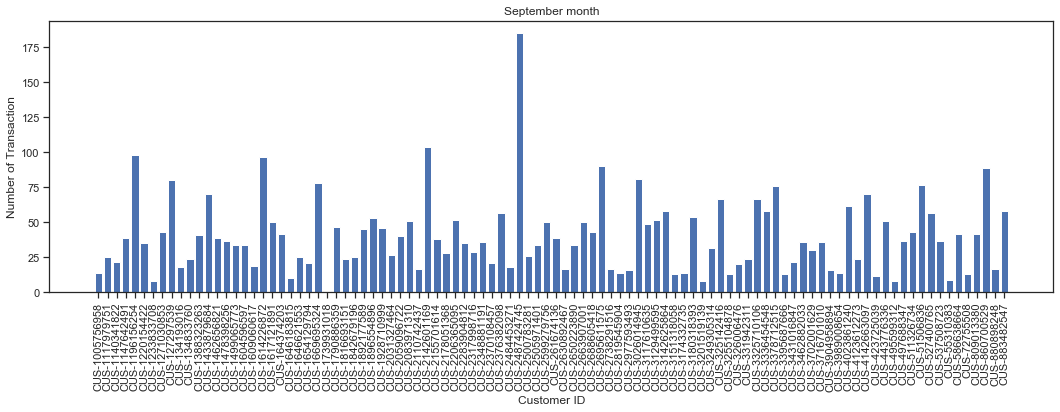

In [25]:
custvaluessep = september.groupby('customer_id')['amount'].count()
f, ax = plt.subplots(figsize=(18,5))

plt.bar(custvaluessep.index.to_numpy(),custvaluessep.to_numpy())
plt.xticks(rotation=90)
plt.title('September month')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transaction')
plt.show()

In [26]:
# October month transaction
start_date_oct = '2018-10-01'
end_date_oct = '2018-10-31'

mask_oct = (dfs['date'] >= start_date_oct) & (dfs['date'] <= end_date_oct)
october = dfs.loc[mask_oct]
october

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
7956,authorized,0.0,NaN,ACC-1222300524,AUD,151.23 -33.94,SALES-POS,7163ba4e-86e2-4146-b5e1-033b0a1d43d2,NaN,Michael,...,38,Melbourne,VIC,2018-10-01T00:23:19.000+0000,29.57,f077102cbe80453eabf96683eafc8496,Australia,CUS-2142601169,144.98 -37.84,debit
7957,authorized,0.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,aee28413-5126-40ac-909a-2d91cafad528,NaN,Michael,...,38,Macquarie Park,NSW,2018-10-01T01:26:53.000+0000,8.44,0c9bdb3d9298473b9f47dc08988c8d7a,Australia,CUS-2142601169,151.12 -33.78,debit
7958,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-10-01T02:00:00.000+0000,163.00,ba88c103199c4464adc354c940c5b4c0,Australia,CUS-2688605418,NaN,debit
7959,authorized,0.0,NaN,ACC-958000567,AUD,130.90 -12.37,POS,4179a6ae-b81c-4c3f-82bb-e9868d7d1437,NaN,Sandra,...,34,Helensvale,QLD,2018-10-01T02:09:59.000+0000,10.65,404d08614d8a4dfa991bcfaec12ee79d,Australia,CUS-4142663097,153.32 -27.9,debit
7960,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,INTER BANK,NaN,NaN,Matthew,...,39,NaN,NaN,2018-10-01T03:00:00.000+0000,33.00,eee15b6732fa4f2eafc74f92b77de5e8,Australia,CUS-1790886359,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [27]:
october['amount'].mean()

196.42732321996542

In [28]:
october['amount'].max()

8835.98

In [29]:
october['amount'].min()

0.1

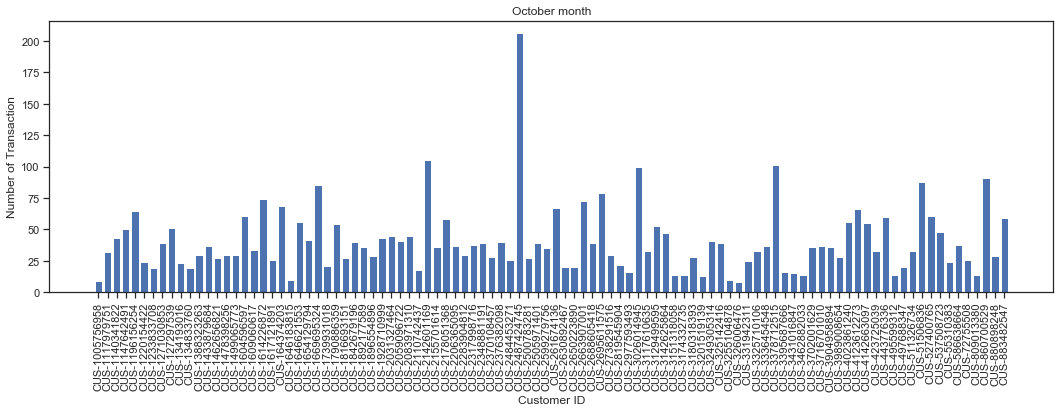

In [30]:
custvaluesoct = october.groupby('customer_id')['amount'].count()
f, ax = plt.subplots(figsize=(18,5))

plt.bar(custvaluesoct.index.to_numpy(),custvaluesoct.to_numpy())
plt.xticks(rotation=90)
plt.title('October month')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transaction')
plt.show()

In [31]:
month = ['August','September','October']
values = [august.shape[0],september.shape[0],october.shape[0]]
values

[3943, 4013, 4087]

Text(0, 0.5, 'Number of Transactions')

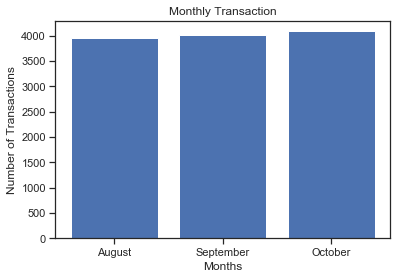

In [32]:
plt.bar(month,values)
plt.title('Monthly Transaction')
plt.xlabel('Months')
plt.ylabel('Number of Transactions')

In [33]:
dfs["week_no"] = pd.to_datetime(dfs["date"]).dt.week

/Users/akshayadlakha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [34]:
dfs

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,week_no
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,31
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,31
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,31
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,31
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,44
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,44
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,44
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,44


In [35]:
dfs.groupby('week_no')['amount'].count()

week_no
31    664
32    894
33    791
34    920
35    940
36    936
37    930
38    943
39    938
40    949
41    928
42    943
43    935
44    332
Name: amount, dtype: int64

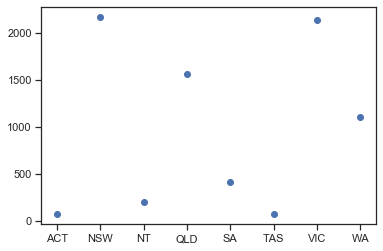

In [36]:
plt.scatter(dfs.groupby('merchant_state')['amount'].count().index,dfs.groupby('merchant_state')['amount'].count())

In [37]:
dfs['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

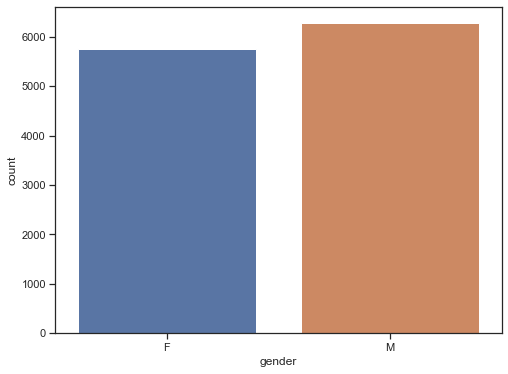

In [38]:
plt.figure(figsize=(8,6))
sb.countplot(dfs['gender'])
plt.show()

In [39]:
dfs['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

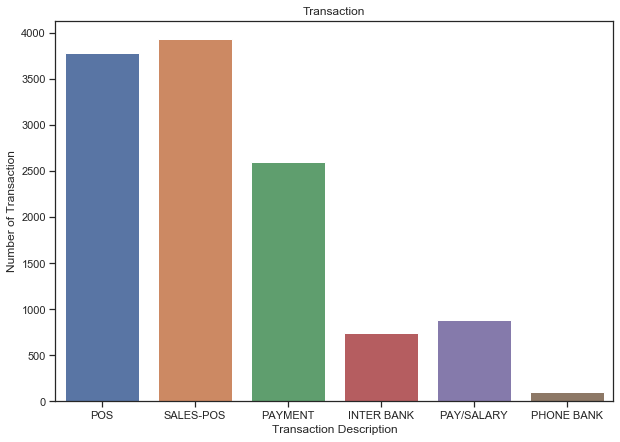

In [40]:
plt.figure(figsize=(10,7))
ax = sb.countplot(dfs['txn_description'])
plt.title('Transaction')
plt.ylabel('Number of Transaction')
plt.xlabel('Transaction Description')
plt.show()

debit     11160
credit      883
Name: movement, dtype: int64


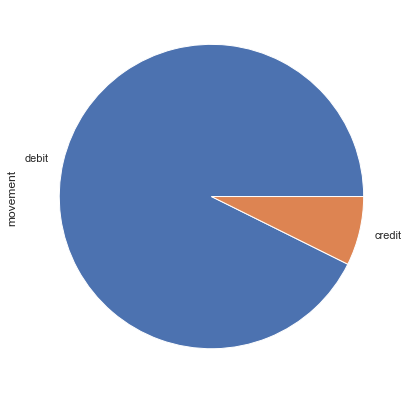

In [41]:
plt.figure(figsize=(10,7))
print(dfs['movement'].value_counts())
dfs['movement'].value_counts().plot.pie()

In [42]:
dfs['day_name'] = dfs['date'].dt.day_name()

In [43]:
dfs.groupby('day_name')['amount'].mean().loc['Monday']

373.22099999999995

In [44]:
dfs.groupby('day_name')['amount'].mean().loc['Tuesday']

221.5764559515801

In [45]:
dfs.groupby('day_name')['amount'].mean().loc['Wednesday']

195.21556955889483

In [46]:
dfs.groupby('day_name')['amount'].mean().loc['Thursday']

184.01042198778472

In [47]:
dfs.groupby('day_name')['amount'].mean().loc['Friday']

249.35351664254722

In [48]:
dfs.groupby('day_name')['amount'].mean().loc['Saturday']

54.419286132241076

In [49]:
dfs.groupby('day_name')['amount'].mean().loc['Sunday']

53.01584516129036

In [50]:
salary = dfs[dfs['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [51]:
salary

,card_present_flag,merchant_code,balance,age,amount,week_no
customer_id,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53.0,970.47,38.000000
CUS-1117979751,NaN,0.0,11957.202857,21.0,3578.65,38.000000
CUS-1140341822,NaN,0.0,5841.720000,28.0,1916.51,37.000000
CUS-1147642491,NaN,0.0,8813.467692,34.0,1711.39,38.000000
CUS-1196156254,NaN,0.0,23845.717143,34.0,3903.73,37.000000
...,...,...,...,...,...,...
CUS-72755508,NaN,0.0,4558.675833,35.0,725.32,37.333333
CUS-809013380,NaN,0.0,5579.186154,21.0,1037.07,38.000000
CUS-860700529,NaN,0.0,4221.468333,30.0,1808.62,37.666667


In [52]:
sl = []

for i in dfs['customer_id']:
    sl.append(int(salary.loc[i]['amount'].mean()))
dfs['annualsalary'] =sl

dfs

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,week_no,day_name,annualsalary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,31,Wednesday,1013
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,31,Wednesday,1013
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,31,Wednesday,1002
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,31,Wednesday,892
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,31,Wednesday,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,44,Wednesday,1636
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,44,Wednesday,2320
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,44,Wednesday,4054
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,44,Wednesday,1043


In [53]:
prddf = dfs[dfs['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [54]:
prddf.shape

(100, 7)

In [55]:
prddf.head()

,card_present_flag,merchant_code,balance,age,amount,week_no,annualsalary
customer_id,,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53.0,970.47,38.0,970.0
CUS-1117979751,NaN,0.0,11957.202857,21.0,3578.65,38.0,3578.0
CUS-1140341822,NaN,0.0,5841.720000,28.0,1916.51,37.0,1916.0
CUS-1147642491,NaN,0.0,8813.467692,34.0,1711.39,38.0,1711.0
CUS-1196156254,NaN,0.0,23845.717143,34.0,3903.73,37.0,3903.0


In [56]:
prddf.drop(['card_present_flag','merchant_code','amount'],axis=1,inplace=True)

In [57]:
prddf.head()

,balance,age,week_no,annualsalary
customer_id,,,,
CUS-1005756958,4718.665385,53.0,38.0,970.0
CUS-1117979751,11957.202857,21.0,38.0,3578.0
CUS-1140341822,5841.720000,28.0,37.0,1916.0
CUS-1147642491,8813.467692,34.0,38.0,1711.0
CUS-1196156254,23845.717143,34.0,37.0,3903.0


In [58]:
X = prddf.iloc[:,:-1].values
Y = prddf.iloc[:,-1].values

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.25)

In [60]:
X_train

array([[1.24140071e+04, 5.20000000e+01, 3.70000000e+01],
       [2.64128047e+05, 4.60000000e+01, 3.70000000e+01],
       [1.57429115e+04, 3.50000000e+01, 3.80000000e+01],
       [5.47897917e+04, 7.80000000e+01, 3.73333333e+01],
       [2.91274000e+03, 1.80000000e+01, 3.70000000e+01],
       [5.10258571e+03, 3.00000000e+01, 3.75000000e+01],
       [3.95940000e+03, 4.00000000e+01, 3.80000000e+01],
       [8.31703071e+03, 2.20000000e+01, 3.75000000e+01],
       [4.51189154e+03, 2.00000000e+01, 3.80000000e+01],
       [3.92912371e+04, 4.20000000e+01, 3.80000000e+01],
       [7.12539286e+03, 2.10000000e+01, 3.70000000e+01],
       [8.81346769e+03, 3.40000000e+01, 3.80000000e+01],
       [3.06728231e+03, 3.70000000e+01, 3.70000000e+01],
       [4.76264167e+03, 4.20000000e+01, 3.70000000e+01],
       [1.33831650e+04, 2.00000000e+01, 3.70000000e+01],
       [8.16595333e+03, 2.20000000e+01, 3.76666667e+01],
       [5.21070500e+03, 4.30000000e+01, 3.75000000e+01],
       [6.99591071e+03, 2.00000

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [62]:
lr.predict(X_test)

array([2818.0961679 , 1855.7604357 , 2180.89873062, 2404.3134862 ,
       2236.23687639, 2423.18436357, 2770.76096674, 2005.57283102,
       2122.85783242, 1882.14549919, 2163.26287426, 2298.95039213,
       2390.3960673 , 1986.76483233, 2122.43159425, 2640.68877115,
       1926.41771194, 1364.36477692, 2347.37797328, 2080.22795433,
       2565.56904535, 1995.96904543, 2042.90252158, 2213.48072864,
       4173.25537795])

In [63]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,lr.predict(X_test))

1039711.5976915199

In [64]:
lr.score(X_test,Y_test)

0.18842684422614964

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [66]:
y_pred = dt.predict(X_test)

In [67]:
dt.score(X_test,Y_test)

0.26407498285425834

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train,Y_train)

RandomForestRegressor()

In [69]:
y_pred_rf = dt.predict(X_test)

In [70]:
rf.score(X_test,Y_test)

0.4861603675602032